In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
%pylab inline
import random as rd
import time
from IPython import display


Populating the interactive namespace from numpy and matplotlib


In [2]:

def kron(op,num):
    a=op
    for ii in range(num-1):
        a = np.kron(a,op)
    return a
        
def kron_all(op,num,op_2):
    total = np.zeros([len(op)**num,len(op)**num])
    a=op
    for jj in range(num):
        if jj != 0:
            a = op_2
        else:
            a = op
            
        for ii in range(num-1):
            if (jj - ii) == 1:
                
                b = op
            else:
                b = op_2
            a = np.kron(a,b)
        total = total + a
    return a        



#Defining time scales
total_time = 5.0
steps = 400

state_transfer = False
#Defining H0
qubit_state_num = 4
qubit_num = 3
alpha = 0.224574
freq_ge = 3.9225#GHz
ens = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)
H0 = kron_all(H_q,qubit_num, I_q) 
X = kron(Q_x,qubit_num)
Z = kron(Q_z,qubit_num)
Y = kron(Q_y,qubit_num)
XI = kron_all(Q_x,qubit_num,I_q)

       


#Defining Concerned states (starting states)

psi0=[0]

all_ones_index = 0
for ii in range (qubit_num):
    all_ones_index = all_ones_index + qubit_state_num**ii
#Defining states to include in the drawing of occupation
states_draw_list = [0,all_ones_index]
states_draw_names = ['00..0','11..1']

#Defining U (Target)

U = np.zeros(qubit_state_num**qubit_num,dtype=complex)
U[0]=(1)/np.sqrt(2)

U[all_ones_index]=1/np.sqrt(2)
    


#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num**qubit_num)
U0= q_identity

#Defining control Hs

Hops = [X,Y]
ops_max_amp = [2.0,2.0]
Hnames =['x','y']

#Defining convergence parameters
max_iterations = 500
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-6,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0.0001,'d2wdt2':0.0001*0.001, 'inter':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses
u0 = []
u0.append(np.ones(steps))
#u0.append(np.zeros(steps))

H_time_scales = {'0':0.1}

In [3]:
print len(H0)
print all_ones_index

64
21


L-BFGS-B optimization done


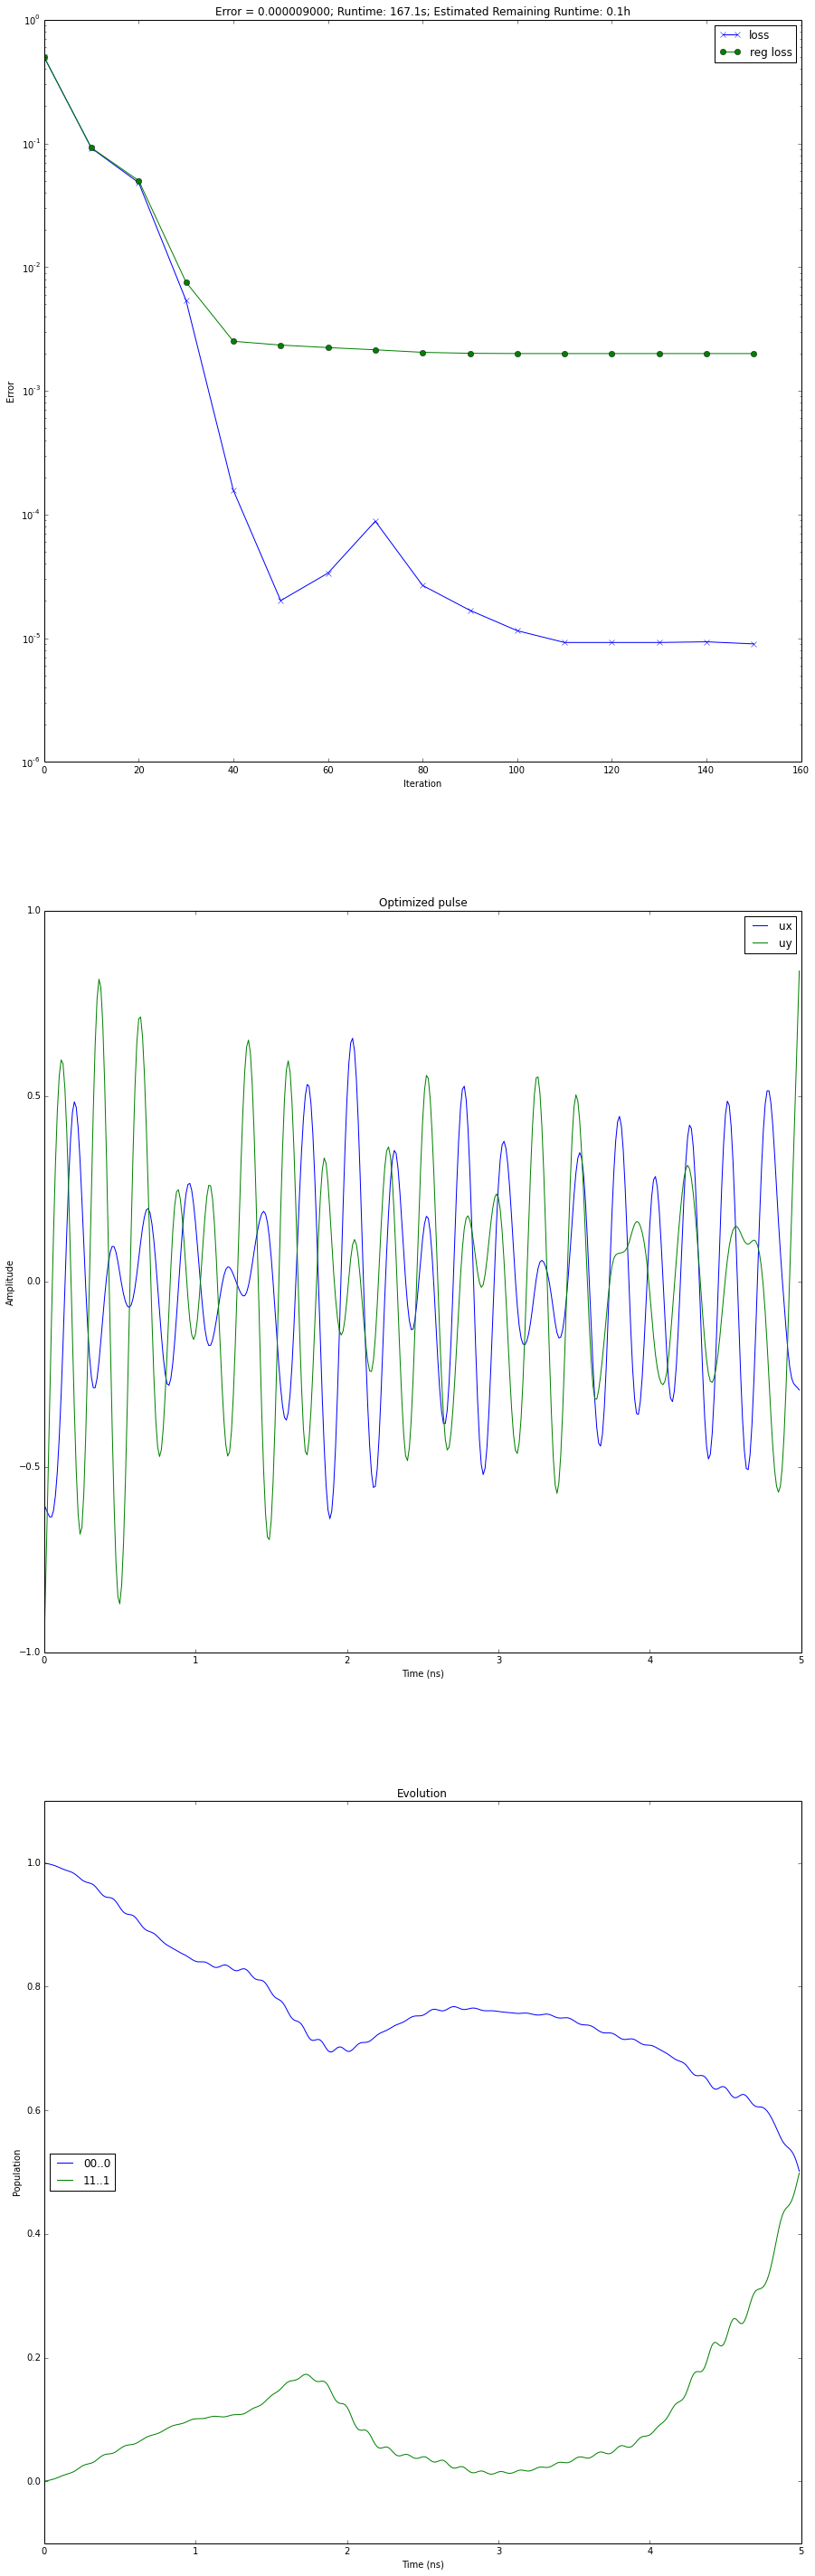

In [4]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
uks,U_final = Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence, draw = [states_draw_list,states_draw_names],show_plots = True, 
       Unitary_error = 1e-6, method = 'L-BFGS-B',switch = False,  maxA=ops_max_amp,\
                    state_transfer=True,reg_coeffs=reg_coeffs )
      
      

In [5]:
print np.shape(uks)
print uks[0]


(2, 400)
[-0.60073328 -0.61270505 -0.62486643 -0.63442922 -0.63446933 -0.61703527
 -0.57716835 -0.51263726 -0.42278409 -0.30794734 -0.17062724 -0.01863236
  0.13460977  0.27331939  0.38380668  0.45565858  0.48424637  0.46940634
  0.41454744  0.32736501  0.21848074  0.10008685 -0.01554865 -0.11817145
 -0.20057812 -0.257415   -0.2861582  -0.28624198 -0.26097733 -0.21639919
 -0.15987989 -0.09964439 -0.04140152  0.01005244  0.05127309  0.07990655
  0.09459905  0.09368402  0.07876363  0.05324772  0.02226823 -0.00819976
 -0.03438426 -0.05425192 -0.06630297 -0.06973176 -0.06362888 -0.04605908
 -0.01770669  0.01959829  0.06198144  0.10470605  0.14342758  0.17367773
  0.19253601  0.19651887  0.18434601  0.15504293  0.1103538   0.05283862
 -0.01272523 -0.08119719 -0.14687146 -0.20457807 -0.24916646 -0.27566424
 -0.27974555 -0.26093149 -0.2203771  -0.16225593 -0.09263349 -0.01670533
  0.05934413  0.13060787  0.19130598  0.23644908  0.26130939  0.26438221
  0.24582063  0.20842148  0.15754145  0.09